In [ ]:
import matplotlib.pyplot as plt
import cv2

Reading original image

In [ ]:
original_img  = cv2.imread("/content/original rgb.png")

Converting BGR to RGB image

(397, 263, 3)


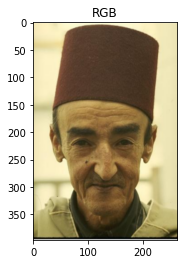

In [ ]:
b,g,r = cv2.split(original_img)       
RGB_img = cv2.merge([r,g,b])     
plt.imshow(RGB_img)
plt.title('RGB')
print(RGB_img.shape)

Converting RGB to Gray Scale image

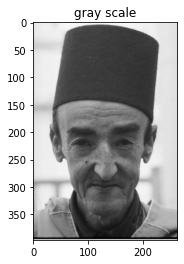

In [ ]:
gray_img=cv2.cvtColor(RGB_img,cv2.COLOR_RGB2GRAY);  #used to convert from(RGB) one color-space to another(Gray-scale) because laplacian filter use gray scale image 
plt.imshow(gray_img,cmap="gray")
plt.title('gray scale')
plt.show()

# Noise reduction using Median filter


*   **Median filter** is good at removing noise while keeping edges sharp by replacing the central element of the image by the median of all the pixels in the kernel area 
*   Ksize=7 (tuned)



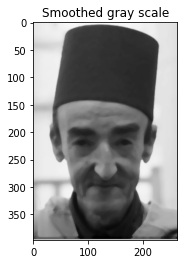

In [ ]:
smoothed_img = cv2.medianBlur(gray_img,7) 
plt.imshow(smoothed_img,cmap="gray")
plt.title('Smoothed gray scale') 
plt.show()

# Edge detection using Laplacian Filter


*   Laplacian filter produces edges that look most similar to hand sketches compared to Sobel or Scharr
*   ddepth - Desired depth of the destination image = CV_8U (unsigned 8 bit/pixel)
*   ksize = 5 (tuned)

Text(0.5, 1.0, 'Laplacian Filter')

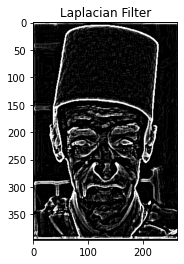

In [ ]:
filtered_img=cv2.Laplacian(smoothed_img, ddepth = cv2.CV_8U, ksize=5)
plt.imshow(filtered_img,cmap='gray')
plt.title('Laplacian Filter')

# Edges Thresholding


*   The Laplacian filter produces
edges with varying brightness, so to make the edges look more like a sketch we apply a **binary threshold** to make the edges either white or black.
*   thresholdValue: 125 (tuned)
*   maxVal: 255
*   thresholdingTechnique: Binary Thresholding



(397, 263)


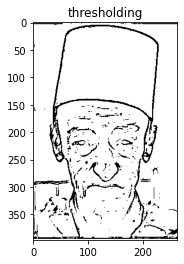

In [ ]:
ret,thresh = cv2.threshold(filtered_img,125,255,cv2.THRESH_BINARY)
plt.imshow(thresh,cmap="binary")
plt.title('thresholding')
print(thresh.shape)

# Applying Bilateral Filter


*   **Bilateral filter** smoothes flat regions while keeping edges sharp, and is therefore great as
an automatic cartoonifier or painting filter

*   We will perform bilateral filtering at a lower resolution to overcome the speed problem .It has similar effect as at full resolution.
*   filter size(d) = 9
*   sigmaColor(color strength) = 9
*   sigmaSpace(spatial strength) = 7


Text(0.5, 1.0, 'bilateral image')

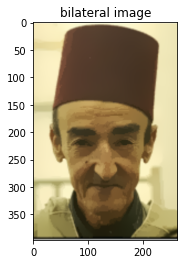

In [ ]:
img = RGB_img

height , width, _ = img.shape
img = cv2.resize(img,(width//2, height//2), interpolation = cv2.INTER_LINEAR)

bilateral_img=img
for i in range (7):
  bilateral_img=cv2.bilateralFilter(bilateral_img,9,9,7) 
bilateral_img = cv2.resize(bilateral_img, (width, height))
plt.imshow(bilateral_img)
plt.title('bilateral image')

Convert sketch from gray scale to RGB

(397, 263, 3)


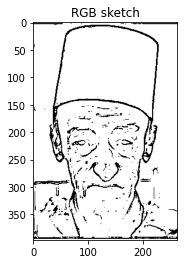

In [ ]:
rgb_sketch = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)  #output is black background and white edges
rgb_sketch = cv2.bitwise_not(rgb_sketch)  #ٌReverse black and white 
plt.imshow(rgb_sketch)
plt.title('RGB sketch')
print(rgb_sketch.shape)

Creating Cartoon Effect

Text(0.5, 1.0, 'cartoon')

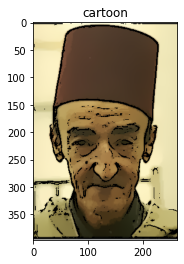

In [ ]:
cartoon_img = cv2.bitwise_and(bilateral_img,rgb_sketch)
plt.imshow(cartoon_img)
plt.title('cartoon')

Text(0.5, 1.0, 'Cartooned')

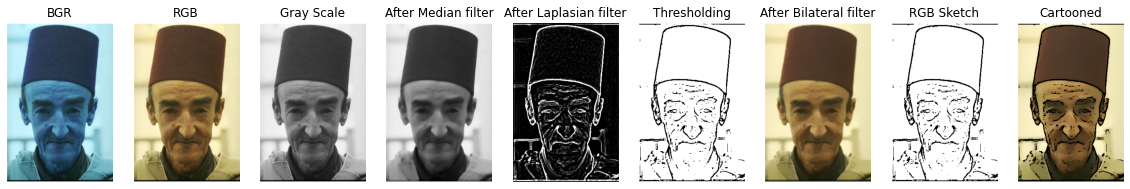

In [ ]:
fig,ax=plt.subplots(nrows=1,ncols=9,figsize=(20,8))
ax=ax.flatten()
ax[0].imshow(original_img);
ax[0].axis('off');
ax[0].set_title('BGR')
ax[1].imshow(RGB_img);
ax[1].axis('off');
ax[1].set_title('RGB')
ax[2].imshow(gray_img,cmap="gray");
ax[2].axis('off');
ax[2].set_title('Gray Scale')
ax[3].imshow(smoothed_img,cmap="gray");
ax[3].axis('off');
ax[3].set_title('After Median filter')
ax[4].imshow(filtered_img,cmap="gray");
ax[4].axis('off');
ax[4].set_title('After Laplasian filter')
ax[5].imshow(thresh,cmap="binary");
ax[5].axis('off');
ax[5].set_title('Thresholding')
ax[6].imshow(bilateral_img);
ax[6].axis('off');
ax[6].set_title('After Bilateral filter')
ax[7].imshow(rgb_sketch);
ax[7].axis('off');
ax[7].set_title('RGB Sketch')
ax[8].imshow(cartoon_img);
ax[8].axis('off');
ax[8].set_title('Cartooned')